# K-최근접 이웃 회귀 (K- Nearest Neighbors)
- knn을 이용한 회귀
- 거리기반의 가장 가까운 k개 이웃을 찾고 근처 k개의 정답의 평균을 계산해서 예측
- 가중평균을 이용해서 거리가 가까울수록 데이터가 더 유사할 것이라 보고 가중치를 부여할 수도 있음
- ex)
- A 영화 / 평점 5.0 / x까지 거리 3.2
- B 영화 / 평점 6.8 / x까지 거리는 10.5
- C 영화 / 평점 9.2 / x까지 거리는 1.1 
- 세 개중 더 가까운 곳에 가중치를 두기

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
import numpy as np
x1=np.arange(1,11)
x=x1.reshape(-1,1)      # reshape를 왜 하는지?
y=np.arange(1,11)*5

In [4]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

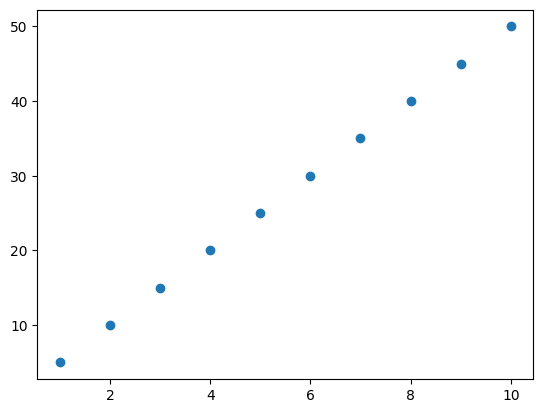

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

In [6]:
knn_model=KNeighborsRegressor(n_neighbors = 2).fit(x,y)
print(knn_model.predict([[3]]))

[12.5]


### knn의 한계
1. 거리기반이다보니 기존에 나타난 데이터에서 벗어난 범위는 정확하게 예측하기가 어렵다. 

## 가중 평균을 주고 데이터 예측

In [7]:
knn_model= KNeighborsRegressor(n_neighbors = 2, weights = 'distance').fit(x,y)

In [8]:
print(knn_model.predict([[3]]))

[15.]


## 집값 데이터 분석 - boston

In [40]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
raw_df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',	'TAX','PTRATIO']
boston=raw_df.copy()        # 실습 때 쓴 데이터를 다운받을 수 없는 상황, B와 LSTAT 컬럼이 없음

In [42]:
target=pd.DataFrame(target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [43]:
boston=boston.dropna(axis=0).reset_index()

df=pd.concat([boston,target],axis=1)

In [45]:
df=df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',	'TAX','PTRATIO','target']]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,22.0


In [46]:
X_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [47]:
X_train

array([[1.2744e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.8541e+02,
        4.8400e+00],
       [4.2030e-02, 2.8000e+01, 1.5040e+01, ..., 1.8200e+01, 3.9501e+02,
        8.1600e+00],
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       ...,
       [1.7783e-01, 0.0000e+00, 9.6900e+00, ..., 1.9200e+01, 3.9577e+02,
        1.5100e+01],
       [1.6566e+00, 0.0000e+00, 1.9580e+01, ..., 1.4700e+01, 3.7280e+02,
        1.4100e+01],
       [5.4452e-01, 0.0000e+00, 2.1890e+01, ..., 2.1200e+01, 3.9690e+02,
        1.8460e+01]])

## 평가 지표 - RMSE
- k값에 따른 변화 확인

In [48]:
from sklearn import neighbors

In [58]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance')     # 가중평균
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), '가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 6.693814821366446
RMSE value k 2 = 6.380824188042741
RMSE value k 3 = 5.9630709986228085
RMSE value k 4 = 5.602578162363255
RMSE value k 5 = 5.525196562895132
RMSE value k 6 = 5.533681546767543
RMSE value k 7 = 5.536101763454209
RMSE value k 8 = 5.582590975005214
RMSE value k 9 = 5.611919360924164
RMSE value k 10 = 5.707278113906254
RMSE value k 11 = 5.805818931328756
RMSE value k 12 = 5.831280051873655
RMSE value k 13 = 5.866615679170571
RMSE value k 14 = 5.9100956727555145
RMSE value k 15 = 5.92726279414911
RMSE value k 16 = 6.008023566757406
RMSE value k 17 = 6.119144883063843
RMSE value k 18 = 6.135835550930445
RMSE value k 19 = 6.125160266750089
RMSE value k 20 = 6.168953605111781
가장최소 rmse 5.525196562895132 가장 최소 k 5


<Axes: >

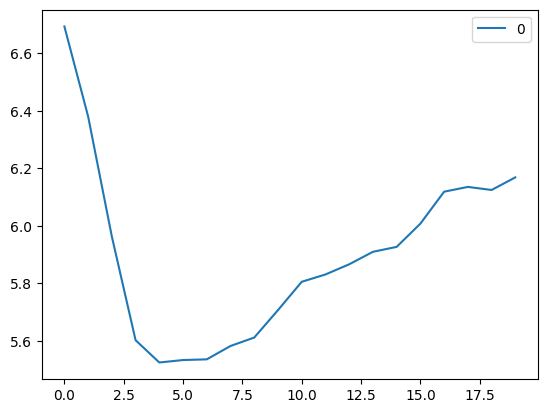

In [59]:
curve = pd.DataFrame(rmse_val)
curve.plot()

## 시각화

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

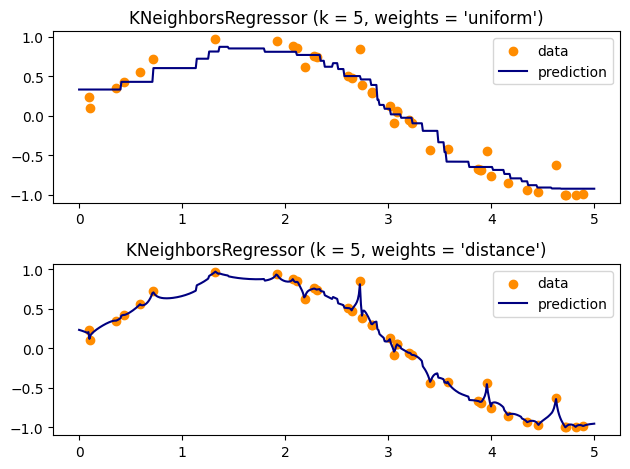

In [61]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

### 거리 계산 방식 변경
- 민코프스키 거리
- 유클리디안 거리
- 쳬비셰프거리

In [62]:
# 민코프스키 거리 - 가장 최소 rmse 가짐
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance',p=1)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 1 = 6.141461472614466
RMSE value k 2 = 5.393932310638778
RMSE value k 3 = 5.245870199541819
RMSE value k 4 = 5.147800328082349
RMSE value k 5 = 4.975700471558504
RMSE value k 6 = 4.985434752881027
RMSE value k 7 = 4.987551511910933
RMSE value k 8 = 5.034205568785697
RMSE value k 9 = 5.115025139452238
RMSE value k 10 = 5.181290907393281
RMSE value k 11 = 5.237325855426631
RMSE value k 12 = 5.3125716439413715
RMSE value k 13 = 5.371519191499192
RMSE value k 14 = 5.402513005453905
RMSE value k 15 = 5.454508881592082
RMSE value k 16 = 5.532116650619012
RMSE value k 17 = 5.600026865527533
RMSE value k 18 = 5.623608018949974
RMSE value k 19 = 5.641687870041087
RMSE value k 20 = 5.672283519863834
가장최소 rmse 4.975700471558504


In [64]:
#유클리디안 거리 
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance',p=2)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 1 = 6.693814821366446
RMSE value k 2 = 6.380824188042741
RMSE value k 3 = 5.9630709986228085
RMSE value k 4 = 5.602578162363255
RMSE value k 5 = 5.525196562895132
RMSE value k 6 = 5.533681546767543
RMSE value k 7 = 5.536101763454209
RMSE value k 8 = 5.582590975005214
RMSE value k 9 = 5.611919360924164
RMSE value k 10 = 5.707278113906254
RMSE value k 11 = 5.805818931328756
RMSE value k 12 = 5.831280051873655
RMSE value k 13 = 5.866615679170571
RMSE value k 14 = 5.9100956727555145
RMSE value k 15 = 5.92726279414911
RMSE value k 16 = 6.008023566757406
RMSE value k 17 = 6.119144883063843
RMSE value k 18 = 6.135835550930445
RMSE value k 19 = 6.125160266750089
RMSE value k 20 = 6.168953605111781
가장최소 rmse 5.525196562895132


In [65]:
#쳬비셰프거리
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance',p=3)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 1 = 6.913782767549378
RMSE value k 2 = 6.643051620358276
RMSE value k 3 = 6.307041306022343
RMSE value k 4 = 6.0069001984761465
RMSE value k 5 = 5.877828764537981
RMSE value k 6 = 5.920498589626609
RMSE value k 7 = 5.863550908847311
RMSE value k 8 = 5.810951722674219
RMSE value k 9 = 5.85377269142935
RMSE value k 10 = 5.980058976651154
RMSE value k 11 = 6.00495175257204
RMSE value k 12 = 6.011095354672008
RMSE value k 13 = 6.114742488955943
RMSE value k 14 = 6.173283600684073
RMSE value k 15 = 6.196272781052407
RMSE value k 16 = 6.278396252132605
RMSE value k 17 = 6.304173400023197
RMSE value k 18 = 6.355632823519072
RMSE value k 19 = 6.448478287761988
RMSE value k 20 = 6.44686765234158
가장최소 rmse 5.810951722674219
